# Sales Analysis

#### import Necessery Libraries

In [42]:
import os
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
%matplotlib inline

### Task 1:Merging 12 months of sales data into a single file and update the frames

In [5]:
files = [file for file in os.listdir('./Sales_Data') ]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_data.csv", index=False)

#### Read in updated frames

In [6]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Drop rows of NaN

In [7]:
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Find 'Or' and delete it 

In [8]:
all_data = all_data[all_data['Order Date']. str[0:2] != 'Or']

#### Convert coloums to correct type

In [9]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) # Make int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])# Make float

### Task:2 Augment Data with additional coloums for the required data to be analysed 

#### Add Month coloumn

In [10]:
all_data['Month'] = all_data['Order Date']. str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Add Sales Coloumn

In [11]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Add City Coloumn

In [12]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City']=all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


### Task:3 Proceeding with the Required Data Analysis 

### Best month for sales and the amount earned that month

In [13]:
results = all_data.groupby('Month').sum()

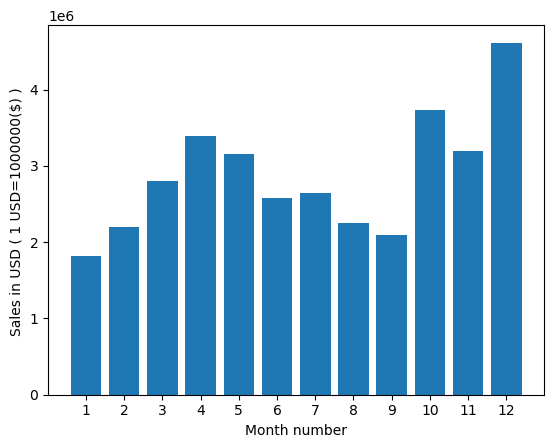

In [14]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ( 1 USD=1000000($) ) ')
plt. xlabel('Month number')
plt.show()

### City Which has the Highest number of sales

In [15]:
results = all_data.groupby('City').sum()

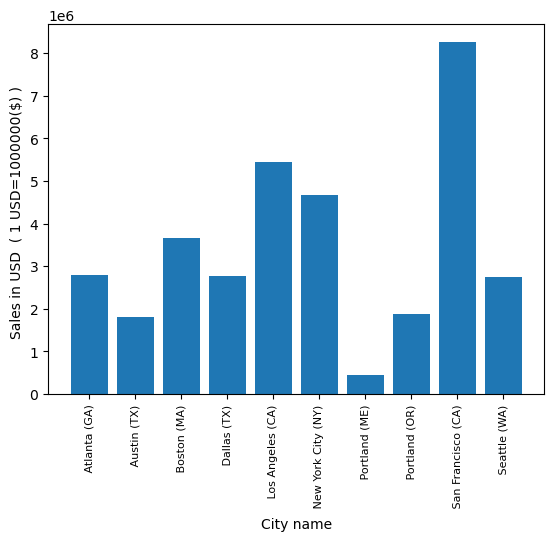

In [16]:
import matplotlib.pyplot as plt

cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD  ( 1 USD=1000000($) ) ')
plt.xlabel('City name')
plt.show()

### The time we should display advertisement to maximize the likehood of customer's buying product

In [17]:
# Add hour column
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()

C:\Users\Jerop\AppData\Local\Temp\ipykernel_13548\3943995571.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
C:\Users\Jerop\AppData\Local\Temp\ipykernel_13548\3943995571.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


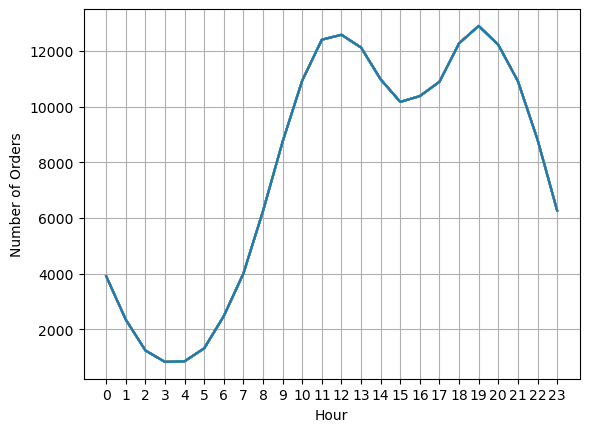

In [20]:
hours = [hour for hour, df in all_data.groupby('Hour') ]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

# My recommendation is around 11am (11) or 7pm (19)

### Products that are often sold together

In [30]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID') ['Product']. transform(lambda x: ', '.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head()

C:\Users\Jerop\AppData\Local\Temp\ipykernel_13548\42342447.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID') ['Product']. transform(lambda x: ', '.join(x))


,Order ID,Grouped
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"


In [31]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)



('iPhone', ' Lightning Charging Cable') 1005
('Google Phone', ' USB-C Charging Cable') 987
('iPhone', ' Wired Headphones') 447
('Google Phone', ' Wired Headphones') 414
('Vareebadd Phone', ' USB-C Charging Cable') 361
('iPhone', ' Apple Airpods Headphones') 360
('Google Phone', ' Bose SoundSport Headphones') 220
('Vareebadd Phone', ' Wired Headphones') 143
(' USB-C Charging Cable', ' Wired Headphones') 120
('Vareebadd Phone', ' Bose SoundSport Headphones') 80


This list would help in order to offer the "partner product" when someone buy the other product of the pair

### Quantity of products by Order ID

Product
1    171301
2      6778
3       340
4        17
5         1
Name: count, dtype: int64

C:\Users\Jerop\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Jerop\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Jerop\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


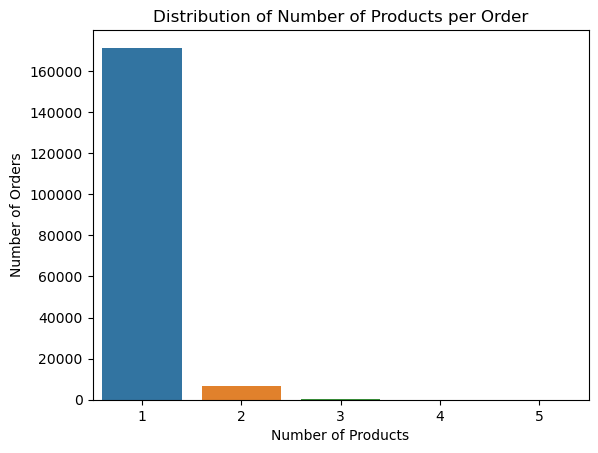

In [32]:
product_counts = all_data.groupby('Order ID')['Product'].count().value_counts()
display(product_counts)
sns.barplot(x=product_counts.index, y=product_counts.values)
plt.xlabel('Number of Products')
plt.ylabel('Number of Orders')
plt.title('Distribution of Number of Products per Order')
plt.show()

**There was 16778 Orders of 1 product, 340 orders of 2 products, 17 orders of 3 products , 4 order of 4 products, 1 order of 5 products**

### Product that sold the most 

C:\Users\Jerop\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Jerop\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Jerop\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


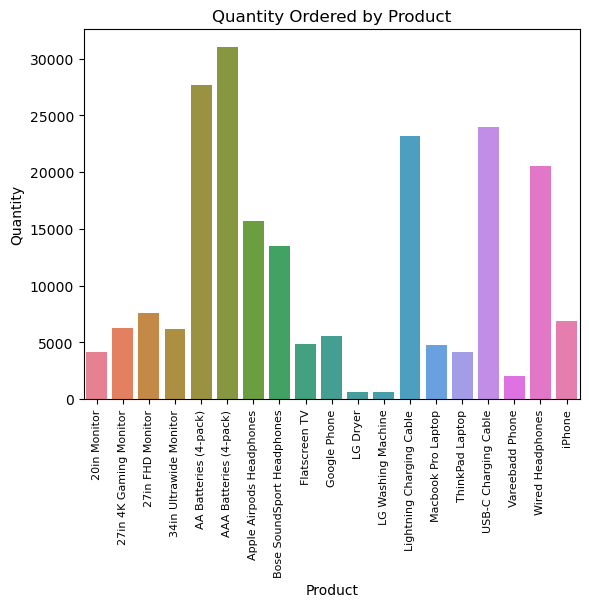

In [33]:
import seaborn as sns
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()[['Quantity Ordered']]

g=sns.barplot(data=quantity_ordered,x=quantity_ordered.index,y='Quantity Ordered',palette='husl')
g.set_title("Quantity Ordered by Product")
plt.ylabel('Quantity')
plt.xlabel('Product')
plt.xticks(rotation='vertical', size=8)
plt.show()

**In conclusion the product that sold the most is AAA Batteries (4-pack)**

### Task 4: Market Basket Analysis

#### Use Cases
* Build Netflix-style recommendation engine
* Improve product recommendations on an e-commerce store
* Cross-sell products in a retail setting
* Improve inventory management
* Upsell produc

#### Listing out the Product Transaction

In [58]:
## Generate a comma separated column of products by id
df_agg = all_data.groupby('Order ID')['Product'].agg(lambda x: ','.join(x)).reset_index().drop('Order ID',axis=1)

In [59]:
# Generated a list of transactions and products
transactions = df_agg['Product'].apply(lambda t: t.split(',')).tolist()
transactions

[['iPhone'],
 ['Lightning Charging Cable'],
 ['Wired Headphones'],
 ['27in FHD Monitor'],
 ['Wired Headphones'],
 ['AAA Batteries (4-pack)'],
 ['27in 4K Gaming Monitor'],
 ['USB-C Charging Cable'],
 ['Bose SoundSport Headphones'],
 ['Apple Airpods Headphones'],
 ['Apple Airpods Headphones'],
 ['Macbook Pro Laptop'],
 ['AAA Batteries (4-pack)'],
 ['27in FHD Monitor'],
 ['Flatscreen TV'],
 ['27in FHD Monitor'],
 ['Vareebadd Phone'],
 ['Apple Airpods Headphones'],
 ['USB-C Charging Cable'],
 ['AA Batteries (4-pack)'],
 ['AAA Batteries (4-pack)'],
 ['USB-C Charging Cable'],
 ['Google Phone'],
 ['Apple Airpods Headphones'],
 ['AA Batteries (4-pack)'],
 ['AAA Batteries (4-pack)'],
 ['AAA Batteries (4-pack)'],
 ['USB-C Charging Cable'],
 ['AAA Batteries (4-pack)'],
 ['Bose SoundSport Headphones'],
 ['Apple Airpods Headphones'],
 ['Apple Airpods Headphones'],
 ['27in 4K Gaming Monitor'],
 ['Apple Airpods Headphones'],
 ['AA Batteries (4-pack)'],
 ['27in 4K Gaming Monitor'],
 ['Wired Headphones

In [60]:
products=all_data['Product'].unique().tolist()
products

['USB-C Charging Cable',
 'Bose SoundSport Headphones',
 'Google Phone',
 'Wired Headphones',
 'Macbook Pro Laptop',
 'Lightning Charging Cable',
 '27in 4K Gaming Monitor',
 'AA Batteries (4-pack)',
 'Apple Airpods Headphones',
 'AAA Batteries (4-pack)',
 'iPhone',
 'Flatscreen TV',
 '27in FHD Monitor',
 '20in Monitor',
 'LG Dryer',
 'ThinkPad Laptop',
 'Vareebadd Phone',
 'LG Washing Machine',
 '34in Ultrawide Monitor']

In [61]:
# using mlxtend package

# Instantiate transaction encoder and identify unique items in transactions
encoder = TransactionEncoder().fit(transactions)

# One-hot encode transactions
onehot = encoder.transform(transactions)

# Convert one-hot encoded data to DataFrame
onehot = pd.DataFrame(onehot, columns = encoder.columns_)
onehot

,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178432,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
178433,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
178434,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
178435,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


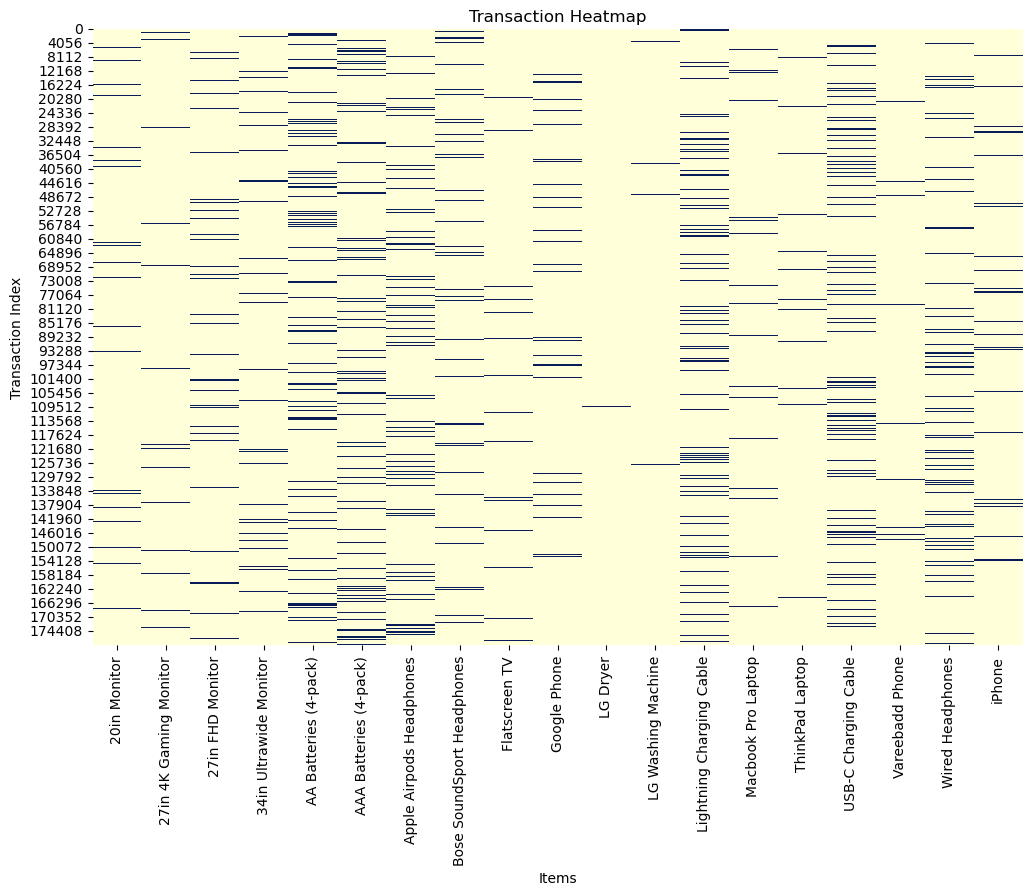

In [54]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'transactions' is a list of lists, where each sublist is a transaction.
# Example: transactions = [['Milk', 'Bread'], ['Bread', 'Diaper', 'Beer'], ...]

# Instantiate transaction encoder and identify unique items in transactions
encoder = TransactionEncoder().fit(transactions)

# One-hot encode transactions
onehot = encoder.transform(transactions)

# Convert one-hot encoded data to DataFrame
onehot_df = pd.DataFrame(onehot, columns=encoder.columns_)

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(onehot_df, cmap="YlGnBu", cbar=False)
plt.title('Transaction Heatmap')
plt.xlabel('Items')
plt.ylabel('Transaction Index')
plt.show()


On the above Heat Map each row corresponds to a transaction and each column to an item. Cells in the heatmap will be colored based on whether the item was present in the transaction (true) or not (false). This is a great way to visualize the distribution of items across transactions.

#### Products ordered by Support values

In [63]:

support = onehot.mean()
print(support.sort_values(ascending=False))

USB-C Charging Cable          0.122480
Lightning Charging Cable      0.121074
AAA Batteries (4-pack)        0.115408
AA Batteries (4-pack)         0.115122
Wired Headphones              0.105623
Apple Airpods Headphones      0.087005
Bose SoundSport Headphones    0.074525
27in FHD Monitor              0.042020
iPhone                        0.038333
27in 4K Gaming Monitor        0.034886
34in Ultrawide Monitor        0.034600
Google Phone                  0.030946
Flatscreen TV                 0.026867
Macbook Pro Laptop            0.026458
ThinkPad Laptop               0.023123
20in Monitor                  0.022966
Vareebadd Phone               0.011573
LG Washing Machine            0.003732
LG Dryer                      0.003620
dtype: float64


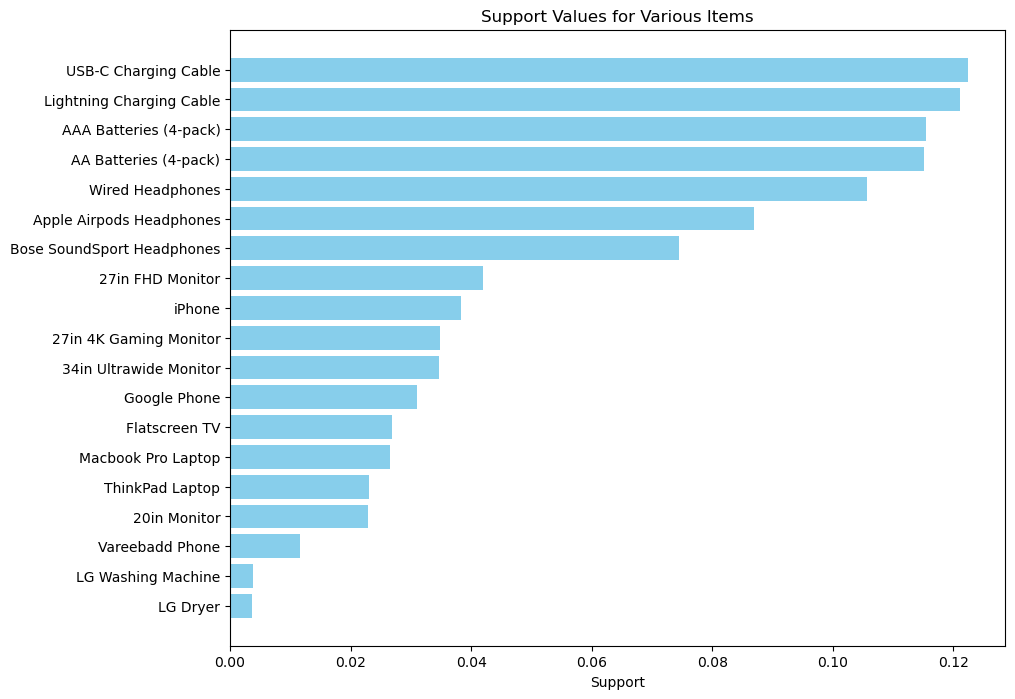

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Directly taken the values from the product ordered by support values and used in the dataframe
data = {
    'USB-C Charging Cable':          0.122480,
    'Lightning Charging Cable':      0.121074,
    'AAA Batteries (4-pack)':        0.115408,
    'AA Batteries (4-pack)':         0.115122,
    'Wired Headphones':              0.105623,
    'Apple Airpods Headphones':      0.087005,
    'Bose SoundSport Headphones':    0.074525,
    '27in FHD Monitor':              0.042020,
    'iPhone':                        0.038333,
    '27in 4K Gaming Monitor':        0.034886,
    '34in Ultrawide Monitor':        0.034600,
    'Google Phone':                  0.030946,
    'Flatscreen TV':                 0.026867,
    'Macbook Pro Laptop':            0.026458,
    'ThinkPad Laptop':               0.023123,
    '20in Monitor':                  0.022966,
    'Vareebadd Phone':               0.011573,
    'LG Washing Machine':            0.003732,
    'LG Dryer':                      0.003620
}

# Creating a Pandas Series from the data
support = pd.Series(data)

# Sorting the support values in descending order
sorted_support = support.sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 8))
plt.barh(sorted_support.index, sorted_support, color='skyblue')
plt.xlabel('Support')
plt.title('Support Values for Various Items')
plt.gca().invert_yaxis()  # Inverting y-axis to have the largest item at the top
plt.show()



#### Frequent itemsets - pruning - Association rules

In [64]:
frequent_itemsets = apriori(onehot, min_support = 0.002, max_len = 3, use_colnames = True)
print(f'len of frequent itemsets: {len(frequent_itemsets)}')
print(frequent_itemsets)

len of frequent itemsets: 25
     support                                 itemsets
0   0.022966                           (20in Monitor)
1   0.034886                 (27in 4K Gaming Monitor)
2   0.042020                       (27in FHD Monitor)
3   0.034600                 (34in Ultrawide Monitor)
4   0.115122                  (AA Batteries (4-pack))
5   0.115408                 (AAA Batteries (4-pack))
6   0.087005               (Apple Airpods Headphones)
7   0.074525             (Bose SoundSport Headphones)
8   0.026867                          (Flatscreen TV)
9   0.030946                           (Google Phone)
10  0.003620                               (LG Dryer)
11  0.003732                     (LG Washing Machine)
12  0.121074               (Lightning Charging Cable)
13  0.026458                     (Macbook Pro Laptop)
14  0.023123                        (ThinkPad Laptop)
15  0.122480                   (USB-C Charging Cable)
16  0.011573                        (Vareebadd Phone)

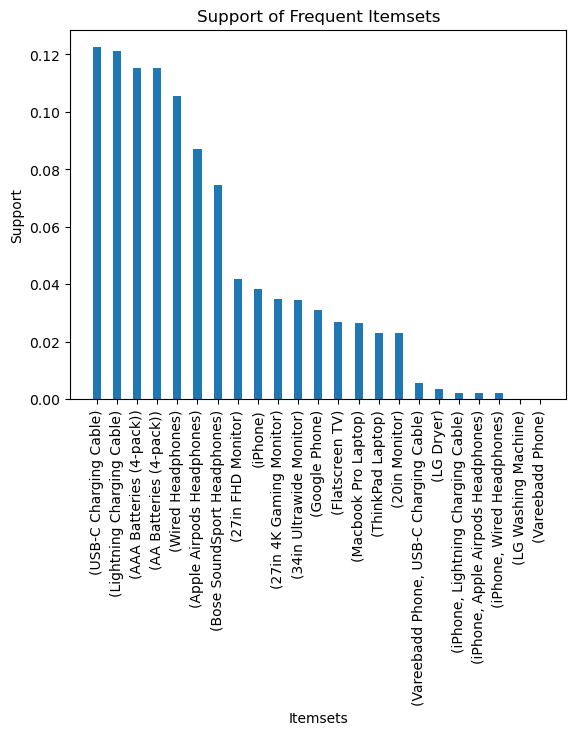

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Data from support and itemsets were directly used in dataframes from the printed frequent_items
support_values = [0.022966, 0.034886, 0.042020, 0.034600, 0.115122, 0.115408, 0.087005, 0.074525, 0.026867, 0.030946, 0.003620, 0, 0.121074, 0.026458, 0.023123, 0.122480, 0, 0.105623, 0.038333, 0.002090, 0.002365, 0.005666, 0.002062, 0.002589]

itemset_labels = ['(20in Monitor)', '(27in 4K Gaming Monitor)', '(27in FHD Monitor)', '(34in Ultrawide Monitor)', '(AA Batteries (4-pack))', '(AAA Batteries (4-pack))', '(Apple Airpods Headphones)', '(Bose SoundSport Headphones)', '(Flatscreen TV)', '(Google Phone)', '(LG Dryer)', '(LG Washing Machine)', '(Lightning Charging Cable)', '(Macbook Pro Laptop)', '(ThinkPad Laptop)', '(USB-C Charging Cable)', '(Vareebadd Phone)', '(Wired Headphones)', '(iPhone)', '(iPhone, Apple Airpods Headphones)', '(iPhone, Lightning Charging Cable)', '(Vareebadd Phone, USB-C Charging Cable)', '(iPhone, Wired Headphones)']

sorted_itemsets = sorted(zip(itemset_labels, support_values), key=lambda x: x[1], reverse = True)

sorted_itemset_labels, sorted_support_values = zip(*sorted_itemsets)

plt.bar(sorted_itemset_labels, sorted_support_values, width=0.4, align="center")

plt.title('Support of Frequent Itemsets')
plt.xlabel('Itemsets')
plt.ylabel('Support')

plt.xticks(rotation=90)

plt.show()


In [66]:
rules = association_rules(frequent_itemsets, metric = "support", min_threshold = 0.002)
print(f'The number of rules is {len(rules)}')
print('\n')
print('TABLE OF METRICS FOR RULES')
rules.sort_values('lift',ascending=False)

The number of rules is 12


TABLE OF METRICS FOR RULES


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(USB-C Charging Cable),(Google Phone),0.122480,0.030946,0.005587,0.045619,1.474120,0.001797,1.015374,0.366521
3,(Google Phone),(USB-C Charging Cable),0.030946,0.122480,0.005587,0.180551,1.474120,0.001797,1.070865,0.331900
8,(USB-C Charging Cable),(Vareebadd Phone),0.122480,0.011573,0.002062,0.016838,1.454996,0.000645,1.005356,0.356360
9,(Vareebadd Phone),(USB-C Charging Cable),0.011573,0.122480,0.002062,0.178208,1.454996,0.000645,1.067813,0.316374
7,(iPhone),(Lightning Charging Cable),0.038333,0.121074,0.005666,0.147807,1.220804,0.001025,1.031370,0.188077
6,(Lightning Charging Cable),(iPhone),0.121074,0.038333,0.005666,0.046797,1.220804,0.001025,1.008880,0.205782
4,(Wired Headphones),(Google Phone),0.105623,0.030946,0.002365,0.022391,0.723534,-0.000904,0.991248,-0.299343
5,(Google Phone),(Wired Headphones),0.030946,0.105623,0.002365,0.076422,0.723534,-0.000904,0.968383,-0.282798
10,(Wired Headphones),(iPhone),0.105623,0.038333,0.002589,0.024513,0.639482,-0.001460,0.985833,-0.386632
11,(iPhone),(Wired Headphones),0.038333,0.105623,0.002589,0.067544,0.639482,-0.001460,0.959163,-0.369577


### Conclusions

- The top-selling products are charging cables, wired headphones and between more expensive products we can mention 27 in Monitor and iphone
- The most profitable customers are in San Francisco
- Sales trends show a peak in October, November and above all December, with a decline in january-february and june-july. The best selling hours are at 12 and sunset.
- Market basket analysis has identified several product associations, such as ('iPhone', 'Lightning Charging Cable'), ('Google Phone', 'USB-C Charging Cable') if we taking in account the number of times the combination appears. If we taking in account association rules and "lift" metric "(Google Phone)-(USB-C Charging Cable)" is the combination that have the best metric and "(Vareebadd Phone)-(USB-C Charging Cable)" is coming close second. This opens opportunity for offering the associate product and even evaluate adding a discount to it.